In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Curso Minedu

Curso: Gestiona entornos virtuales para apoyar el aceeso a los contenidos, actividades y evaluaciones diversificadas 2ed

In [2]:
# Cargamos los datos
df = pd.read_csv("../data/df_encuesta_final.csv",sep=";") 
df

C:\Users\JuniorOM\AppData\Local\Temp\ipykernel_19000\2780594732.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/df_encuesta_final.csv",sep=";")


,Curso,Region,Ugel,Edad,Sexo,Cargo,Cargo_otros,Nivel,Nivel_otros,Grado,...,pc_00,pc_01,pc_02,pc_03,pc_04,pc_05,pc_06,pc_07,pc_08,pc_09
0,Bienestar socioemocional para el retorno a la ...,AMAZONAS,Utcubamba,51 a 60,Mujer,Director,NaN,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
1,Bienestar socioemocional para el retorno a la ...,AMAZONAS,UTCUBAMBA,41 a 50,Hombre,Director,PRIMARIA,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
2,Bienestar socioemocional para el retorno a la ...,AMAZONAS,LUYA,51 a 60,Mujer,Docente,NaN,Primaria,NaN,Primaria,...,NaN,0,0,0,0,0,0,0,0,0
3,Bienestar socioemocional para el retorno a la ...,AMAZONAS,303,31 a 40,Hombre,Docente,NaN,Primaria,NaN,Primaria,...,NaN,1,0,1,0,1,0,0,0,0
4,Bienestar socioemocional para el retorno a la ...,AMAZONAS,Bongará,51 a 60,Hombre,Docente,NaN,Secundaria,NaN,Secundaria,...,NaN,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33258,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,CHICLAYO,41 a 50,Mujer,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,0,0,0,0,1,0
33259,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,lambayeque,20 a 30,Mujer,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,0,0,0,0,0,1
33260,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,lambayeuqe,41 a 50,Hombre,Docente,NaN,Secundaria,NaN,Secundaria 22,...,NaN,0,0,0,1,0,0,0,0,0
33261,Evaluación diagnóstica para el buen retorno,LAMBAYEQUE,CHICLAYO,41 a 50,Hombre,Docente,NaN,Secundaria,MATEMATICA,Secundaria 22,...,NaN,0,0,0,0,1,0,0,0,0


### Data Cleaning

In [3]:
#Funcion de nulos y count
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space',4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))
    print()
    return
# side_by_side(df.isnull().sum(),df.value_counts())

In [4]:
side_by_side(df.isnull().sum(),df.value_counts())

# Salida del total filas si tienen valores 
#df.info()

Curso                        0    Series([], dtype: int64)
Region                       0                            
Ugel                       380                            
Edad                       125                            
Sexo                       170                            
Cargo                       49                            
Cargo_otros              25956                            
Nivel                       56                            
Nivel_otros              28640                            
Grado                     4247                            
Inicial                  21261                            
Primaria                 22510                            
Secundaria               19814                            
Experiencia_anio           708                            
Situacion_laboral          109                            
Situacion_laboral_Esp    17097                            
p1                           0                          

In [5]:
# Elimar columnas 
df1 = df.drop(['Curso'
                ,'Ugel'
                ,'Cargo_otros'
                ,'Nivel_otros'
                ,'Inicial'
                ,'Primaria'
                ,'Secundaria'
                ,'Experiencia_anio'
                ,'Situacion_laboral_Esp'
                ,'p10'
                ,'p11'
                ,'p12'
                ,'p17'
                ,'p18'
                ,'p17_Esp'
                ,'p18_Esp'
                ,'p19_Esp'
                ,'p19_Esp_1'
                ,'p19_Esp_2'
                ,'p21_Esp'
                ,'pc_00'],axis=1)

In [6]:
df1.columns

Index(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado',
       'Situacion_laboral', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p13', 'p14', 'p15', 'p16', 'p19', 'p20', 'p21', 'pc_01', 'pc_02',
       'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],
      dtype='object')

## Reclasificar las variables de importancia

In [7]:

# p1 al p10
reclass_01 = {"Satisfecho":1,"Muy satisfecho":1,"Poco satisfecho": 0,"Nada satisfecho":0}
df1['p1'] = df1['p1'].map(reclass_01)

reclass_02 = {"Nada satisfecho":1,"Poco satisfecho":2,"Satisfecho":3,"Muy satisfecho":4}
df1['p2'] = df1['p2'].map(reclass_02)
df1['p3'] = df1['p3'].map(reclass_02)
df1['p4'] = df1['p4'].map(reclass_02)
df1['p5'] = df1['p5'].map(reclass_02)
df1['p6'] = df1['p6'].map(reclass_02)
df1['p7'] = df1['p7'].map(reclass_02)
df1['p8'] = df1['p8'].map(reclass_02)
df1['p9'] = df1['p9'].map(reclass_02)
df1['p13'] = df1['p13'].map(reclass_02)
df1['p14'] = df1['p14'].map(reclass_02)

reclass_03 = {'Nada útil':1,'Poco útil':2,"Útil":3,"Muy útil":4}
df1['p15'] = df1['p15'].map(reclass_03)
df1['p16'] = df1['p16'].map(reclass_03)

reclass_04 = {'Sí':1,'No':0}
df1['p19'] = df1['p19'].map(reclass_04)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33263 entries, 0 to 33262
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             33263 non-null  object 
 1   Edad               33138 non-null  object 
 2   Sexo               33093 non-null  object 
 3   Cargo              33214 non-null  object 
 4   Nivel              33207 non-null  object 
 5   Grado              29016 non-null  object 
 6   Situacion_laboral  33154 non-null  object 
 7   p1                 33263 non-null  int64  
 8   p2                 33263 non-null  int64  
 9   p3                 33263 non-null  int64  
 10  p4                 33263 non-null  int64  
 11  p5                 33263 non-null  int64  
 12  p6                 33263 non-null  int64  
 13  p7                 33263 non-null  int64  
 14  p8                 33263 non-null  int64  
 15  p9                 33263 non-null  int64  
 16  p13                332

In [9]:
# Valores NA
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
nulos = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
nulos.head(10)

,Total,Percent
Grado,4247,0.127679
p16,4061,0.122088
p15,4061,0.122088
p19,1755,0.052761
Sexo,170,0.005111
Edad,125,0.003758
Situacion_laboral,109,0.003277
Nivel,56,0.001684
Cargo,49,0.001473
pc_02,0,0.000000


In [10]:
df1.isnull().values.any()

True

In [11]:
df2 = df1.dropna()

In [12]:
df2.isnull().values.any()

False

In [13]:
print(df2.shape)

(28746, 32)


### Check Balance

Conteo de Classe p1 : Satisfaccion del Curso
1    27112
0     1634
Name: p1, dtype: int64
(28746, 32)


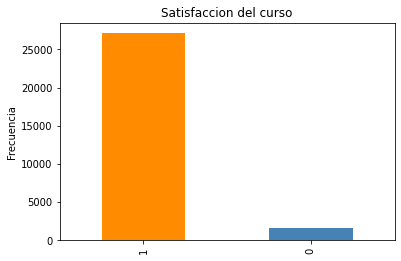

In [67]:
print("Conteo de Classe p1 : Satisfaccion del Curso")
print(df2['p1'].value_counts())
print(df2.shape)
df2['p1'].value_counts().plot(kind='bar', color= ['darkorange','steelblue'])
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()

In [15]:
def plot_corr_v2(df):
    fig=plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

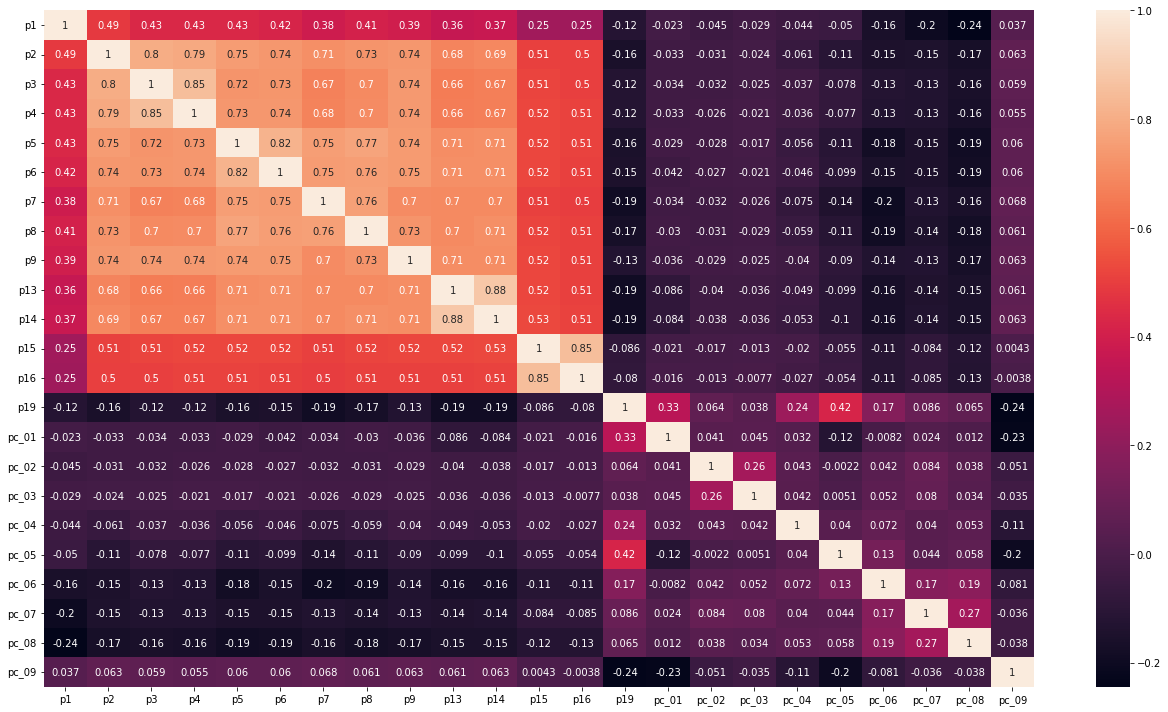

In [16]:
plot_corr_v2(df2)

A partir de este grafico utilizaremos las caracteristicas con correlacion mayor a 0.2 para la variable satisfaccion 

<AxesSubplot:>

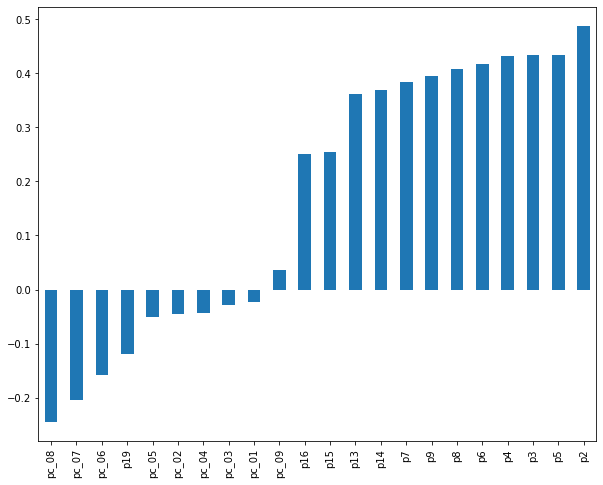

In [17]:
df2.corr()['p1'].sort_values().drop('p1').plot(kind='bar',figsize=(10,8))

3    20021
4     6810
2     1823
1       92
Name: p2, dtype: int64


<AxesSubplot:ylabel='Frequency'>

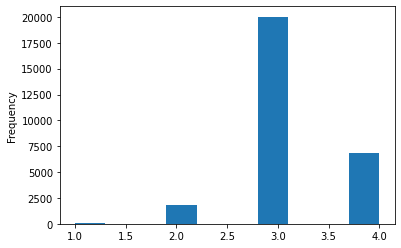

In [18]:
print(df2['p2'].value_counts())
df2['p2'].plot(kind='hist')


<AxesSubplot:xlabel='p1', ylabel='p2'>

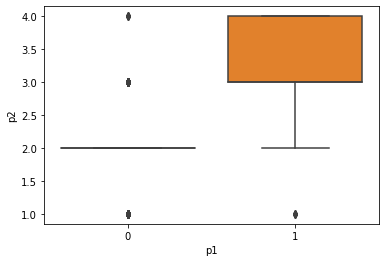

In [19]:
sns.boxplot(x='p1',y='p2',data=df2)

Cuanto mas este la persona satisfecha con el cumplimiento de sus expectativas, mayores seran las posibilidades de que este satisfecha con el curso en general. Lo mismo ocurriria con los demas parametros

In [20]:
# Ahora veamos la correlacion de la variable p2 : Cumplimiento de las expetactivas 
# con las otras variables

<AxesSubplot:>

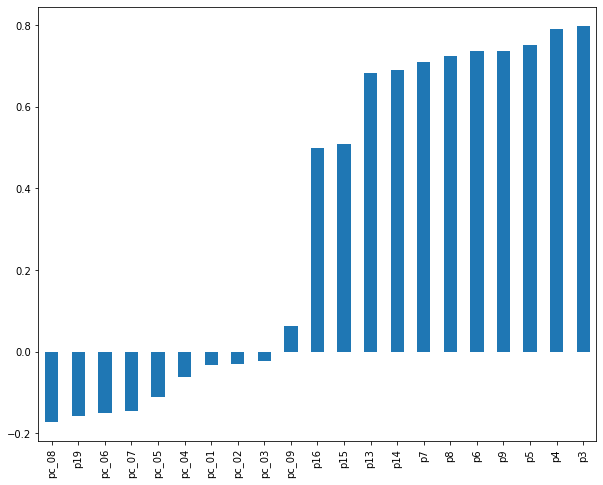

In [21]:
df2.corr()['p2'].sort_values().drop(['p2','p1']).plot(kind='bar',figsize=(10,8))

<AxesSubplot:xlabel='p3', ylabel='p2'>

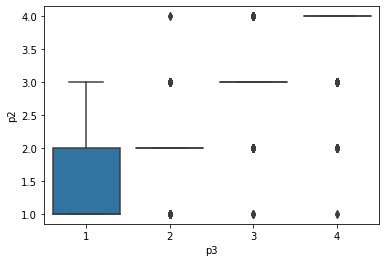

In [22]:
sns.boxplot(x='p3',y='p2',data=df2)

Es probable que las personas que obtienen una mayor satisfacciión en la utilidad del curso para la aplicacion en su praqctica pédagogica y cumplimiento de sus expectativas , esten satisfechas con el curso

## Eliminando Columnas

In [23]:
df2.columns

Index(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado',
       'Situacion_laboral', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       'p9', 'p13', 'p14', 'p15', 'p16', 'p19', 'p20', 'p21', 'pc_01', 'pc_02',
       'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],
      dtype='object')

In [24]:
# Columnas P1
df3 = df2.drop(['Region', 'Edad', 'Sexo', 'Cargo', 'Nivel', 'Grado','Situacion_laboral','p19','p20', 'p21', 'pc_01','pc_02', 'pc_03', 'pc_04', 'pc_05', 'pc_06', 'pc_07', 'pc_08', 'pc_09'],axis=1)
# df3['p15']=df3['p15'].astype('int64')
# df3['p16']=df3['p16'].astype('int64')
# df3['p19']=df3['p19'].astype('int64')

In [25]:
df3['p15']=df3['p15'].astype('int64')
df3['p16']=df3['p16'].astype('int64')

In [26]:
df3.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p13,p14,p15,p16
0,1,4,4,4,4,4,4,4,4,4,4,4,4
1,1,4,4,4,3,4,4,4,4,4,4,4,4
2,1,3,3,3,3,3,3,3,3,3,3,3,3
3,1,3,3,3,3,3,3,3,3,3,3,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3


1    27112
0     1634
Name: p1, dtype: int64


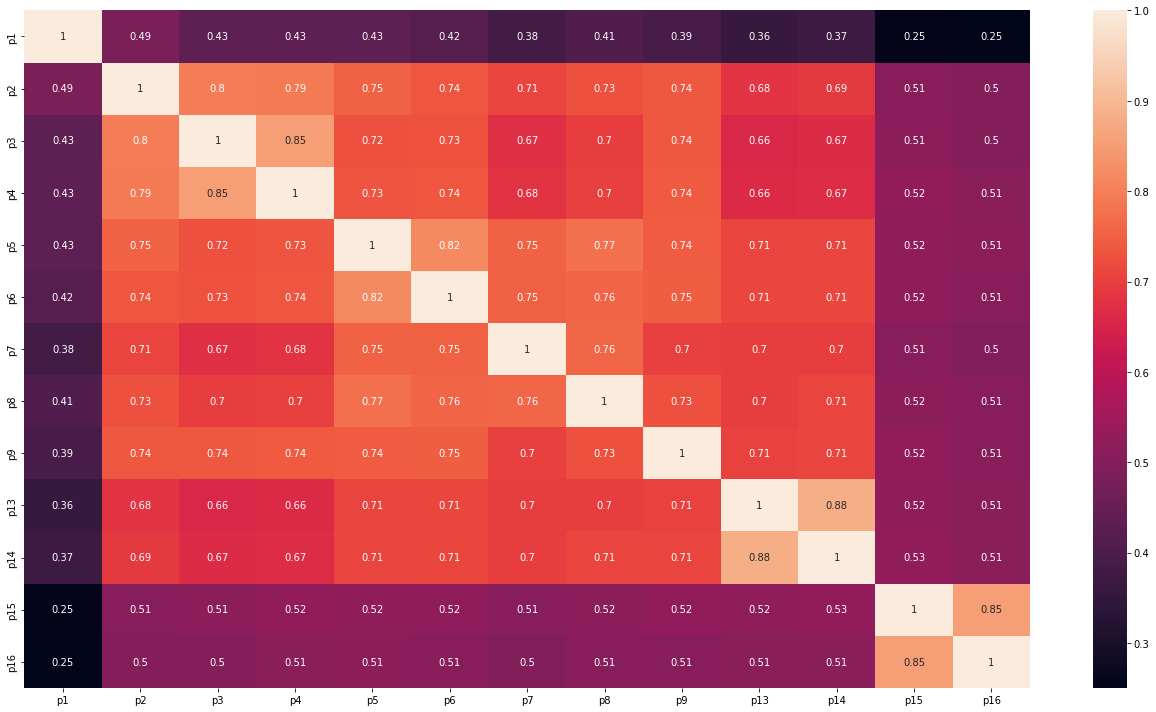

In [27]:
print(df3['p1'].value_counts())
plot_corr_v2(df3)

## Seleccion del Modelo

Regresion logistica ( Optimizar el mejor C )

In [28]:
x= df3.drop('p1',axis=1)
y = df3['p1']


In [29]:
# Separar los datos de entrenamiendo y prueba en una proporcion de 70 a 30 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)


(20122, 12) (8624, 12)


In [30]:
# Configuracion del MOdelo 
logit_model = LogisticRegression(max_iter=1000)

In [31]:
logit_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = logit_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [33]:
# Diagnostico del modelo 
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

[[ 341  130]
 [  78 8075]]
Accuracy:  0.9758812615955473


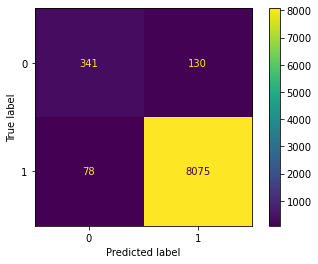

In [34]:
#Grafico de matrix de confusion 
matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix , display_labels= logit_model.classes_)
matrix_plot.plot()
plt.show()

In [35]:
print(metrics.classification_report(y_test,y_pred , target_names=["No Satisfecho","Satisfecho"]))

               precision    recall  f1-score   support

No Satisfecho       0.81      0.72      0.77       471
   Satisfecho       0.98      0.99      0.99      8153

     accuracy                           0.98      8624
    macro avg       0.90      0.86      0.88      8624
 weighted avg       0.97      0.98      0.98      8624



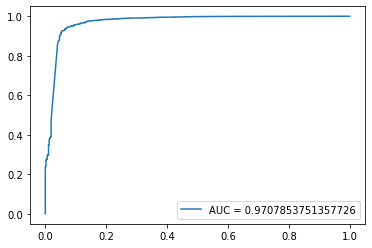

In [36]:
# Plot ROC Curve 
y_pred_proba = logit_model.predict_proba(x_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label= "AUC = " + str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
print(logit_model.intercept_)
print(logit_model.coef_)

[-18.75032052]
[[ 2.93694792  0.97245128  0.88389137  0.95032155  0.62812566  0.17674078
   0.45997872  0.49082526 -0.09020161  0.37868575  0.20950298 -0.20883012]]


## Aplicando Tecnica de Remuestreo SMOTE
Solución  de los datos desbalanceados empleando la técnica Synthetic MInority Oversampling Technique (SMOTE) .- (Tecnica de sobremuestreo de minorias sintéticas) Funciona seleccionando aleatoriamente
 un punto de la clase minoritaria y calculando los k-vecinos mas ceercanos para este punto. Los puntos sintéticos se suman entre el punto elegido y su vecinos 

print("Conteo de Classe p1 : Satisfaccion del Curso")
print(df3['p1'].value_counts())
print(df2.shape)
df3['p1'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'])
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()

Conteo de Classe p1 : Satisfaccion del Curso
1    27112
0     1634
Name: p1, dtype: int64
(28746, 32)


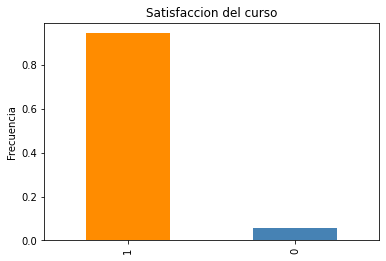

In [45]:
print("Conteo de Classe p1 : Satisfaccion del Curso")
print(df2['p1'].value_counts())
print(df2.shape)
df2['p1'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'])
plt.ylabel('Frecuencia')
plt.title('Satisfaccion del curso')
plt.show()

1    27112
0    27112
Name: p1, dtype: int64
(54224,)


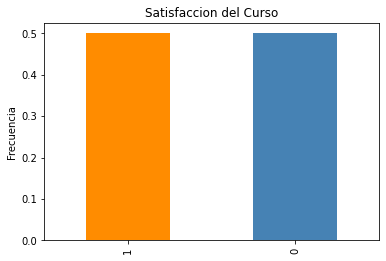

In [71]:
import imblearn
oversamp = imblearn.over_sampling.SMOTE()
x_over , y_over = oversamp.fit_resample(x,y)

print(y_over.value_counts())
print(y_over.shape)
y_over.value_counts(normalize= True).plot(kind='bar', color= ['darkorange','steelblue'])
plt.ylabel("Frecuencia")
plt.title("Satisfaccion del Curso")
plt.show()

In [74]:
# Dividir el df3 en datos de entrenamiento y prueba 
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over,y_over, test_size=0.3, random_state=0)

# Definir el modelo 
over_log_reg = LogisticRegression()

# Entrenar el modelo 
over_log_reg.fit(x_over_train,y_over_train)

# Predecir con el data test 
over_y_pred = over_log_reg.predict(x_over_test)

# Diagnostico del modelo 
over_cnf_mtrx = metrics.confusion_matrix(y_over_test,over_y_pred)
print(over_cnf_mtrx)
print("Accuracy: ", metrics.accuracy_score(y_over_test,over_y_pred))
print(metrics.classification_report(y_over_test, over_y_pred))

[[7491  619]
 [ 318 7840]]
Accuracy:  0.9424022621096632
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8110
           1       0.93      0.96      0.94      8158

    accuracy                           0.94     16268
   macro avg       0.94      0.94      0.94     16268
weighted avg       0.94      0.94      0.94     16268



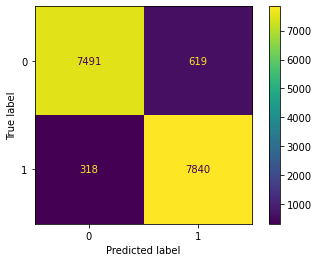

In [76]:
# Grafico de Matriz de confusion
matrix_plot2= metrics.ConfusionMatrixDisplay(confusion_matrix = over_cnf_mtrx, display_labels= over_log_reg.classes_)
matrix_plot2.plot()
plt.show()


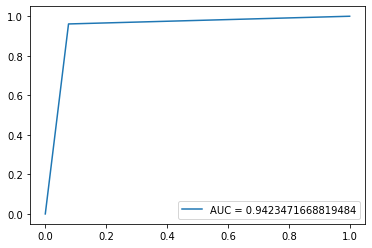

In [77]:
# Plot ROC Curve 
y_pred_proba = over_log_reg.predict_proba(x_over_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_over_test,over_y_pred)
auc = metrics.roc_auc_score(y_over_test,over_y_pred)
plt.plot(fpr,tpr,label= "AUC = " + str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
print(over_log_reg.intercept_)
print(over_log_reg.coef_)

[-25.76492687]
[[ 3.37505956  0.99665409  0.72543352  1.52584116  0.40410024  0.40259096
   0.46888797  0.71501574  0.09347874  0.41118381  0.32647971 -0.0872798 ]]


In [59]:
import statsmodels.api as sm
logit_model = sm.Logit(y_over_train,x_over_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.573719
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     p1   No. Observations:                37956
Model:                          Logit   Df Residuals:                    37944
Method:                           MLE   Df Model:                           11
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.1723
Time:                        15:31:57   Log-Likelihood:                -21776.
converged:                       True   LL-Null:                       -26309.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p2             1.9168      0.039     49.277      0.000       1.841       1.993
p3            -0.1829      0.

In [66]:
import statsmodels.api as sm
logit_model2 = sm.Logit(y_train,x_train)
result2=logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.152529
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     p1   No. Observations:                20122
Model:                          Logit   Df Residuals:                    20110
Method:                           MLE   Df Model:                           11
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.3094
Time:                        15:39:40   Log-Likelihood:                -3069.2
converged:                       True   LL-Null:                       -4444.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p2             2.1279      0.108     19.662      0.000       1.916       2.340
p3             0.0462      0.